In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.7 MB/s eta 0:00:00


In [2]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.2 MB/s eta 0:00:00


In [3]:
# Importamos las bibliotecas necesarias de Qiskit
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## ENTRELAZAMIENTO (PROGRAMA 1)

In [ ]:
# Paso 1: Crear un circuito cuántico con 2 qubits y 2 bits clásicos
qc = QuantumCircuit(2, 2)
# Paso 2: Aplicar la puerta de Hadamard al primer qubit
qc.h(0)  # La puerta de Hadamard coloca el primer qubit en una superposición
# Paso 3: Aplicar la puerta CNOT con el primer qubit como control y el segundo como objetivo
qc.cx(0, 1)  # La puerta CNOT entrelaza el primer y segundo qubit

### Barrera para visualización ###
qc.barrier()
### Barrera para visualización ###

# Paso 4: Medir los qubits
qc.measure([0, 1], [0, 1])  # Medimos ambos qubits y almacenamos los resultados en los bits clásicos correspondientes
# Visualizamos el circuito
print(qc.draw())

     ┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 


In [ ]:
# Paso 5: Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados
# Paso 6: Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola


Resultados de la simulación:
{'11': 523, '00': 501}


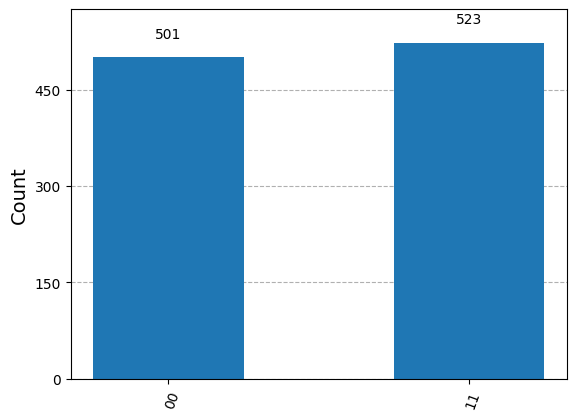

In [ ]:
# Visualizamos los resultados en un histograma
plot_histogram(counts)

## Superposición (PROGRAMA 2) **Explicación del JUEGO CUÁNTICO**

In [8]:
# Paso 1: Crear un circuito cuántico con 1 qubits y 1 bits clásicos
qc = QuantumCircuit(1, 1)
# Paso 2: Aplicar la puerta de Hadamard al primer qubit
qc.h(0)  # La puerta de Hadamard coloca el primer qubit en una superposición

# Paso 3: Medir los qubits
qc.measure([0], [0])  # Medir todos los qubits.
# Visualizamos el circuito
print(qc.draw())

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


In [9]:
# Paso 4: Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados
# Paso 5: Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola


Resultados de la simulación:
{'1': 535, '0': 489}


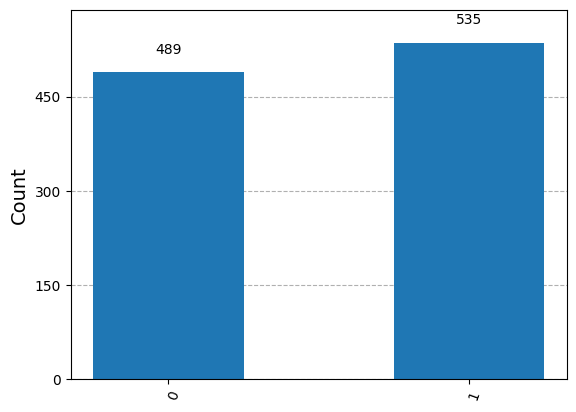

In [10]:
# Visualizamos los resultados en un histograma
plot_histogram(counts)

In [17]:
# Paso 1: Crear un circuito cuántico con 1 qubits y 1 bits clásicos
qc = QuantumCircuit(1, 1)
# Paso 2:
# qc.x(0) # Cambiar de BLANCO a NEGRO.
qc.h(0)  # ABRIMOS SUPERPOSICIÓN
qc.h(0)  # CERRAMOS SUPERPOSICIÓN

# Paso 3: Medir los qubits
qc.measure([0], [0])  # Medir todos los qubits.
# Visualizamos el circuito
print(qc.draw())

     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 


In [18]:
# Paso 4: Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados
# Paso 5: Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola


Resultados de la simulación:
{'0': 1024}


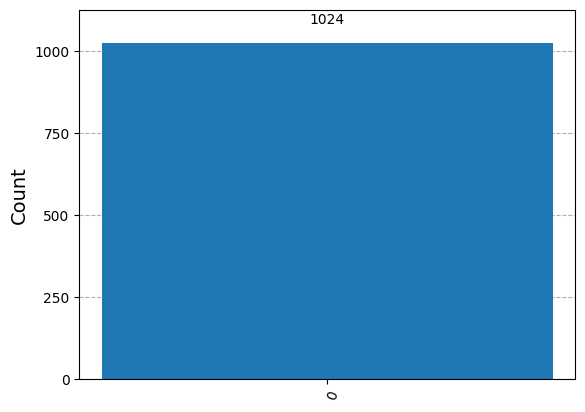

In [19]:
# Visualizamos los resultados en un histograma
plot_histogram(counts)

## COMPUERTA PAULI-X "NOT" (PROGRAMA 3)

In [ ]:
# Paso 1: Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc = QuantumCircuit(1, 1)
# Paso 2: Aplicar la compuerta Pauli-X al qubit
qc.x(0)  # La compuerta Pauli-X INVIERTE el estado del qubit
qc.barrier() # Barrera para separar etapas (solo visualización)
# Paso 3: Medir el qubit
qc.measure(0, 0)  # Medimos el qubit y almacenamos el resultado en el bit clásico correspondiente
# Visualizamos el circuito
print(qc.draw())

# Paso 4: Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados

# Paso 5: Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola

     ┌───┐ ░ ┌─┐
  q: ┤ X ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0 

Resultados de la simulación:
{'1': 1024}


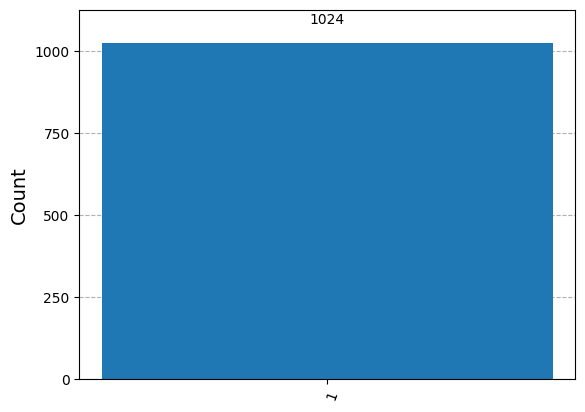

In [ ]:
# Visualizamos los resultados en un histograma
plot_histogram(counts)

## COMPUERTA PAULI-Y (PROGRAMA 4)

In [ ]:
# Paso 1: Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc = QuantumCircuit(1, 1)
# Paso 2: Aplicar la compuerta Pauli-Y al qubit
qc.y(0)  # La compuerta Pauli-Y introduce una rotación combinada en el plano XY
qc.barrier() # Barrera para separar etapas (solo visualización)
# Paso 3: Medir el qubit
qc.measure(0, 0)  # Medimos el qubit y almacenamos el resultado en el bit clásico correspondiente
# Visualizamos el circuito
print(qc.draw())

# Paso 4: Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados

# Paso 5: Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola

     ┌───┐ ░ ┌─┐
  q: ┤ Y ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0 

Resultados de la simulación:
{'1': 1024}


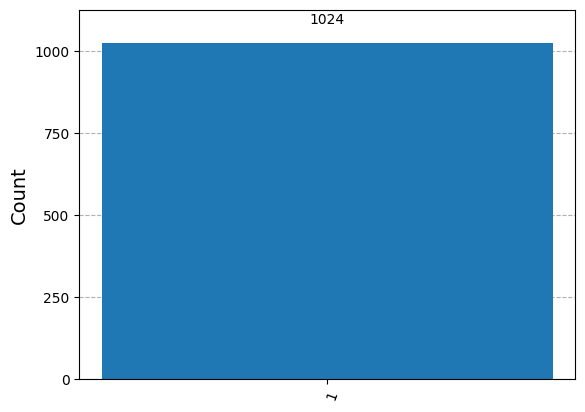

In [ ]:
# Visualizamos los resultados en un histograma
plot_histogram(counts)

## COMPUERTA PAULI-Z (PROGRAMA 5)

In [ ]:
# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc = QuantumCircuit(1, 1)
# Aplicar la compuerta Pauli-Z al qubit

### ¿Qué pasa si aplicamos la compuerta Hadamard para generar superposición? ###
# qc.h(0) # Generamos superposición
################################################################################

qc.z(0)  # La compuerta Pauli-Z introduce una rotación en el plano Z
qc.barrier() # Barrera para separar etapas (solo visualización)
# Medir el qubit
qc.measure(0, 0)  # Medimos el qubit y almacenamos el resultado en el bit clásico correspondiente

# Visualizar el circuito
print(qc.draw())

# Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados

# Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola

     ┌───┐ ░ ┌─┐
  q: ┤ Z ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0 

Resultados de la simulación:
{'0': 1024}


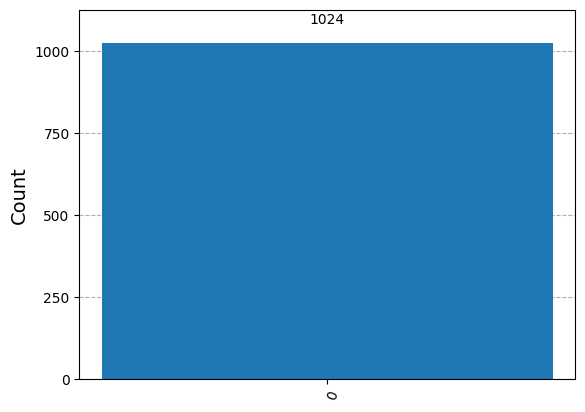

In [ ]:
# Visualizar los resultados en un histograma
plot_histogram(counts)

## COMPUERTA CNOT (PROGRAMA 6)

In [ ]:
# Crear un circuito cuántico con 2 qubits y 2 bits clásicos
qc = QuantumCircuit(2, 2)

### ¿Cómo modificar el circuito cuántico para activar la compuerta CNOT? ###

############################################################################

# Aplicar la compuerta CNOT con el primer qubit como control y el segundo como objetivo
qc.cx(0, 1)  # La compuerta CNOT entrelaza el primer y segundo qubit

# Medir los qubits
qc.measure([0, 1], [0, 1])  # Medimos ambos qubits y almacenamos los resultados en los bits clásicos correspondientes

# Visualizar el circuito
print(qc.draw())

# Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados

# Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola


          ┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 

Resultados de la simulación:
{'00': 1024}


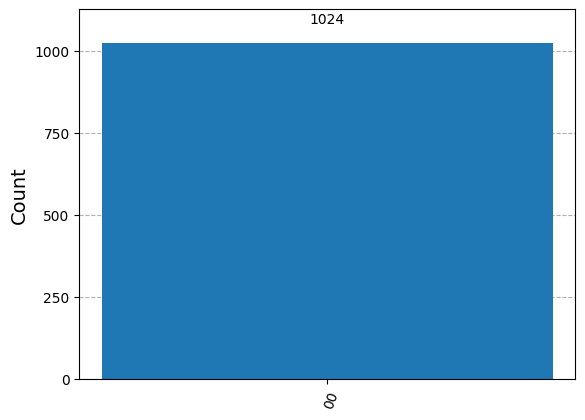

In [ ]:
# Visualizar los resultados en un histograma
plot_histogram(counts)